## Introduction



In our last project we used data to estimate systems of food demand
using different datasets.  An output from that project was as set of
`cfe.Result` objects; these bundle together both data and the results
from the demand system estimation, and can be used for prediction as
well.  

Here we&rsquo;ll explore some of the uses of the `cfe.Result` class, using
an instance created using data from the Indian ICRISAT data.

If you don&rsquo;t already have the latest version of the `cfe` package
installed, grab it, along with some dependencies:



In [1]:
!pip install CFEDemands --upgrade --pre
!pip install xarray --upgrade
!pip install h5netcdf
!pip install CFEDemands --upgrade --pre

    100% |████████████████████████████████| 51kB 1.1MB/s ta 0:00:011
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/ee/11/fb2a8a6015e3de4ff19a4870bb0d11f48ebdd997062557d24cd076b3088f/xarray-0.15.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/71/8f53bdbcbc67c912b888b40def255767e475402e9df64050019149b1a943/pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3d/fc/4763e5f17ac6e7e7d55f377cde859ca1c5d5ac624441ab45315bc578aa9e/numpy-1.18.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/df/635cdb901ee4a8a42ec68e480c49f85f4c59e8816effbf57d9e6ee8b3588/setuptools-46.1.3-py3-none-any.whl
Requirement already up-to-date: pytz>=2017.2 in /srv/app/venv/lib/python3.6/site-packages (from pandas>=0.25->xarray)
Requirement already up

In [2]:
import cfe

cfe.Result?

/usr/lib/python3.6/abc.py:133: FutureWarning: xarray subclass Result should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated from the
Indian ICRISAT data:



In [3]:
r = cfe.result.from_dataset('Nigeria_small.ds')

/srv/app/venv/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:



In [5]:
r.get_alpha(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 4.137737
Agricultural eggs                       4.828057
Bananas                                 4.752126
Beef                                    6.097617
Beer (local and imported)               5.850864
Bread                                   5.065000
Brown beans                             5.226534
Chicken                                 6.381765
Chocolate drinks                        5.264990
Cocoyam                                 4.954118
Condiments,(salt,spices,pepper, etc)    3.358059
Fish-Dried                              5.577516
Fish-Fresh                              6.208897
Fish-Frozen                             5.722683
Fish-Smoked                             5.389794
Garden eggs/egg plant                   4.155502
Gari -Yellow                            5.333468
Gari-White                              5.244837
Goat                                    6.398805
Groundnut oil                           5.270093
Malt drinks       

Elasticity parameters $\beta$:



In [6]:
r.get_beta(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 0.264663
Agricultural eggs                       0.492709
Bananas                                 0.334000
Beef                                    0.315412
Beer (local and imported)               0.327214
Bread                                   0.346662
Brown beans                             0.316207
Chicken                                 0.276107
Chocolate drinks                        0.541461
Cocoyam                                 0.241237
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Fish-Fresh                              0.386942
Fish-Frozen                             0.226933
Fish-Smoked                             0.354824
Garden eggs/egg plant                   0.240667
Gari -Yellow                            0.272450
Gari-White                              0.316419
Goat                                    0.282581
Groundnut oil                           0.344536
Malt drinks       

And parameters related to household characteristics $\delta$:



In [7]:
r.delta.to_dataframe().unstack('k').dropna()

delta                                \
k                                        F 0-3   F 14-18   F 19-30   F 31-50   
i                                                                              
(Cocoyam, Spinach, etc)              -0.023781  0.027689  0.094989  0.110343   
Agricultural eggs                     0.042721  0.048770  0.098147  0.148663   
Bananas                               0.024251  0.035830  0.071993  0.100703   
Beef                                  0.006855  0.067865  0.088548  0.103018   
Beer (local and imported)             0.046941  0.016815  0.016893  0.080541   
Bread                                 0.023225  0.080997  0.096974  0.099630   
Brown beans                           0.028881  0.081007  0.078684  0.109293   
Chicken                              -0.071763 -0.004462  0.060025  0.195275   
Chocolate drinks                      0.070132  0.092243  0.165170  0.115693   
Cocoyam                              -0.046442  0.104503  0.064084  0.025710   
Condiments,(salt,spices,pepper, etc)  0.107599  0.082288  0.056840  0.112495   
Fish-Dried                           -0.020381  0.085493  0.055050  0.062076   
Fish-Fresh                           -0.094961  0.034831  0.107473  0.101196   
Fish-Frozen                           0.035798  0.048886  0.047478  0.073759   
Fish-Smoked                           0.038693  0.136282  0.040907  0.058579   
Garden eggs/egg plant                -0.034263  0.031722  0.020718  0.048421   
Gari -Yellow                         -0.032363  0.031388  0.118099  0.108256   
Gari-White                           -0.027322  0.085809  0.098735  0.125894   
Goat                                 -0.023484 -0.016799  0.107536  0.049343   
Groundnut oil                         0.016858  0.087284  0.059682  0.068239   
Malt drinks                           0.003478  0.049992  0.058493  0.078982   
Milk powder                           0.088818  0.066332  0.141524  0.126835   
Milk tinned (unsweetened)            -0.010725  0.055121  0.027428  0.039411   
Okra-fresh                            0.029346  0.065519  0.092492  0.053412   
Onions                                0.017537  0.075069  0.079954  0.062878   
Orange/tangerine                      0.049942  0.048936  0.043204  0.006788   
Other vegetables (fresh or canned)   -0.025755  0.055946  0.072081  0.028913   
Palm oil                              0.037787  0.090088  0.058209  0.075289   
Pineapples                           -0.021489 -0.014178  0.017237  0.108788   
Plantains                             0.003805  0.109790  0.057469  0.123725   
Rice-Imported                        -0.010551  0.213470  0.169883  0.154974   
Rice-local                            0.033075  0.125565  0.119137  0.084330   
Sachet water                         -0.063939  0.052499  0.064801  0.074672   
Seafood (lobster, crab, prawns)      -0.061463  0.027758  0.163717  0.058583   
Soft drinks (Coca cola, spirit etc)   0.014813  0.071592  0.062311  0.053861   
Sugar                                 0.085182  0.120536  0.128950  0.017301   
Sweet Potatoes                        0.042861  0.020470  0.063971  0.141039   
Tea                                  -0.001488  0.102052 -0.012763  0.110691   
Tomato puree(canned)                 -0.028166  0.096370  0.057285  0.086558   
Tomatoes                              0.039816  0.074168  0.087891  0.100064   
White beans                           0.013274  0.059082  0.096552  0.068464   
Yam-roots                             0.005485  0.084241  0.100080  0.097695   

                                                                              \
k                                        F 4-8     F 51+    F 9-13     M 0-3   
i                                                                              
(Cocoyam, Spinach, etc)               0.015007  0.048901  0.021452 -0.016940   
Agricultural eggs                     0.048441  0.048849  0.020054  0.034552   
Bananas                              -0.

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, and focus on
the first market we&rsquo;re interested in.



In [8]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
medianx = x.where(x>0).sel(t=t,m=m).median('j').values # Budget (median household)

/srv/app/venv/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/app/venv/lib/python3.6/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [9]:
xbar=r.demands(medianx) # Expenditures given median budget
xbar

i
(Cocoyam, Spinach, etc)                   25.067268
Agricultural eggs                        565.395626
Bananas                                   71.575639
Beef                                      86.268161
Beer (local and imported)                 94.020326
Bread                                     93.796520
Brown beans                               66.238228
Chicken                                   53.540855
Chocolate drinks                        1341.028658
Cocoyam                                   22.950863
Condiments,(salt,spices,pepper, etc)     112.800675
Fish-Dried                               242.120570
Fish-Fresh                               247.497077
Fish-Frozen                               22.691006
Fish-Smoked                              117.129674
Garden eggs/egg plant                     18.798051
Gari -Yellow                              38.172886
Gari-White                                66.810061
Goat                                      59.062421
Groundnut 

So we can compute expenditures, but these are in units of Rupees.
We can get into physical units (say kilograms) by dividing coconut
expenditures by the price per kg in a given time and place:



In [10]:
USE_GOOD = 'Yam-roots'
    
# Reference prices for kgs at time t in market m
ref_price = r.prices.sel(t=t,m=m,u='Kilograms')

r.demands(medianx)[USE_GOOD]/ref_price.loc[USE_GOOD].values

1.158639760127091

Now we can trace out demands for a household with median budget but
varying prices of coconuts (holding other prices fixed):



Text(0, 0.5, 'Price Scale')

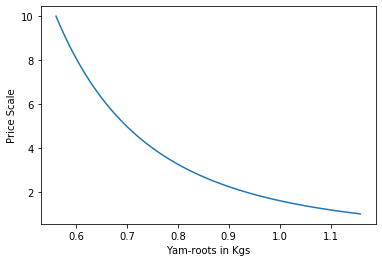

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scales of prices:
# Scales of prices:
P = np.linspace(1,10,100).tolist()

plt.plot([r.demands(medianx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')

Let&rsquo;s trace out demands for different budgets:



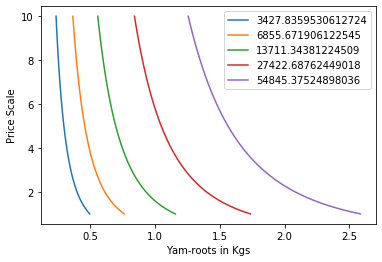

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = [medianx*s for s in [.25,.5,1.,2,4]]
for myx in X:
    plt.plot([r.demands(myx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')
plt.legend(X)